# Call the Library

In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Gather the Dataset 

In [2]:
!wget https://www.dropbox.com/s/b9blcjblfcxjd8a/city_data.csv

--2020-10-29 11:38:00--  https://www.dropbox.com/s/b9blcjblfcxjd8a/city_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b9blcjblfcxjd8a/city_data.csv [following]
--2020-10-29 11:38:00--  https://www.dropbox.com/s/raw/b9blcjblfcxjd8a/city_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2ef974e37520246b28f8aa49df.dl.dropboxusercontent.com/cd/0/inline/BCJ4wBiyGurmO6K3hI4lqoKjgNBQN1JTNDE5y8-43cVyA6YODmwwOl8mD9KZvRYIoRxVWfC7jRSxXdnIiyhm3N1xbkUNpVMNQRplnFdJwsrmhVP_7bvp7XGQZ8OZh145hT0/file# [following]
--2020-10-29 11:38:00--  https://uc2ef974e37520246b28f8aa49df.dl.dropboxusercontent.com/cd/0/inline/BCJ4wBiyGurmO6K3hI4lqoKjgNBQN1JTNDE5y8-43cVyA6YODmwwOl8mD9KZvRYIoRxVWfC7jRSxXdnIiyhm3N1xbkUNpVMNQRplnFdJwsrmhVP

# Read the CSV file through Pandas Library

In [3]:
jp = pd.read_csv("city_data.csv")
display(jp.head())
display(jp.info())

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


None

# Dataframe Index

In [4]:
jp.index

RangeIndex(start=0, stop=29531, step=1)

# We have multiple columns, so we need to group the column based on particular city

In [5]:
Air_data_Delhi=jp.groupby('City').get_group('Delhi')

display(Air_data_Delhi.shape)

display(Air_data_Delhi.head())

(2009, 16)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


# Missing or Null or NaN Values finding

In [6]:
# Missing or Null or NaN Values finding
mis_val = Air_data_Delhi.iloc[:,2:].isnull().sum()
mis_val

PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

# To fill the NaN Values by using the Interpolate

In [7]:
 Air_data_Delhi.iloc[:,2:].interpolate(limit_direction="both",inplace=True)

In [8]:
Air_data_Delhi.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


# DataFrame Copy

In [9]:
Air_data_Delhi_a = Air_data_Delhi.copy()
type(Air_data_Delhi_a)
Air_data_Delhi_a

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


# export as csv file -- to avoid data loss

In [10]:
uu = Air_data_Delhi_a.get(["Date", "AQI" ]) 
uu.to_csv('Data_Date_AQI.csv',index=False)

# PM -- particulate matter

In [11]:
fig = px.line(Air_data_Delhi_a, x="Date", y="PM2.5")
fig.show()

In [12]:
# data After the year 2019 
Data_2019_20=Air_data_Delhi_a[Air_data_Delhi_a['Date']>='2019']
fig = px.line(Data_2019_20, x="Date", y="PM2.5")
fig.show()

In [13]:
# Data from March - May2019  
Data_Mar_May_2019 =Air_data_Delhi_a[(Air_data_Delhi_a['Date'] >= '2019-03') & (Air_data_Delhi_a['Date'] <= '2019-05')]

fig = px.line(Data_Mar_May_2019, x="Date", y="PM2.5")
fig.show()


# During Pandemic Lockdown

In [14]:
# Data from March 2020 to May 2020 # Dusring Pandemic Lock Down 
Data_Mar_May_2020 =Air_data_Delhi_a[(Air_data_Delhi_a['Date'] >= '2020-03') & (Air_data_Delhi_a['Date'] <= '2020-05')]

fig = px.line(Data_Mar_May_2020, x="Date", y="PM2.5")
fig.show()


# Compare the Reults of (Mar-May 2019) & (Mar-May2020 during Pandemic)

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Mar_May_2019['Date'], y=Data_Mar_May_2019['PM2.5'],
                    mode='lines+markers',
                    name='PM2.5 levels of 2019'))
fig.add_trace(go.Scatter(x=Data_Mar_May_2019['Date'], y=Data_Mar_May_2020['PM2.5'],
                    mode='lines+markers',
                    name='PM2.5 levels of 2020-During Pandemic Lockdown'))

fig.show()

# Data after the Year 2019 & 2020

In [16]:
Air_data_2019_after = Air_data_Delhi_a[Air_data_Delhi_a['Date']>='2019']

# NO2  Nitrogen Dioxide level in Delhi


In [17]:
fig = px.line(Air_data_Delhi_a, x="Date", y="NO2")
fig.show()

# NO2 level in Year 2019 , 2020

In [18]:
fig = px.line(Air_data_2019_after, x="Date", y="NO2")
fig.show()

#  NO in 2019 and 2020

In [19]:
fig = px.line(Air_data_2019_after, x="Date", y="NO")
fig.show()


In [20]:
for i,each in enumerate(Air_data_2019_after['AQI_Bucket']):
    if pd.isnull(Air_data_2019_after['AQI_Bucket'].iloc[i]):
        if Air_data_2019_after['AQI'].iloc[i]>=0.0 and Air_data_2019_after['AQI'].iloc[i]<=50.0:
            Air_data_2019_after['AQI_Bucket'].iloc[i]='Good'
        elif Air_data_2019_after['AQI'].iloc[i]>=51.0 and Air_data_2019_after['AQI'].iloc[i]<=100.0:
            Air_data_2019_after['AQI_Bucket'].iloc[i]='Satisfactory'
        elif Air_data_2019_after['AQI'].iloc[i]>=101.0 and Air_data_2019_after['AQI'].iloc[i]<=200.0:
            Air_data_2019_after['AQI_Bucket'].iloc[i]='Moderate'
        elif Air_data_2019_after['AQI'].iloc[i]>=201.0 and Air_data_2019_after['AQI'].iloc[i]<=300.0:
            delhi_data['AQI_Bucket'][i]='Poor'
        elif delAir_data_2019_afterhi_data['AQI'].iloc[i]>=301.0 and Air_data_2019_after['AQI'].iloc[i]<=400.0:
            Air_data_2019_after['AQI_Bucket'].iloc[i]='Very Poor'
        else:
            Air_data_2019_after['AQI_Bucket'].iloc[i]='Severe'

In [21]:
fig = px.line(Air_data_2019_after, x="Date", y="AQI")
fig.show()

# PM 10 Level During 2019 & 2020 (lockdown)

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Mar_May_2019['Date'], y=Data_Mar_May_2019['PM10'],
                    mode='lines+markers',
                    name='PPM10 Levels in Delhi on Mar-May 2019'))
fig.add_trace(go.Scatter(x=Data_Mar_May_2019['Date'], y=Data_Mar_May_2020['PM10'],
                    mode='lines+markers',
                    name='PM10 Levels -- During Pandemic Lockdown in Delhi on Mar-May 2020'))
fig.show()

# NO Level in 2019 Mar-May (vs)  During Lockdown Mar-May 2020

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Mar_May_2019['Date'], y=Data_Mar_May_2019['NO'],
                    mode='lines+markers',
                    name='NO Level in Delhi 2019 Mar-May '))
fig.add_trace(go.Scatter(x=Data_Mar_May_2019['Date'], y=Data_Mar_May_2020['NO'],
                    mode='lines+markers',
                    name='NO Level in Delhi during Lockdown Mar-May 2020'))
fig.show()

# Air Quality Index Monitor

# from 2015 - July 2020

In [24]:
fig = px.line(Air_data_Delhi_a, x="Date", y="AQI")
fig.show()

# from 2019 onwards

In [25]:
fig = px.line(Air_data_2019_after, x="Date", y="AQI")
fig.show()

# AQI Air Quality Index - Level Monitoring
# 0    -  50  = Good 
# 51   -  100 = Satisfactory
# 101  -  200 = Moderate
# 201  -  300 = Poor
# 301  -  400 = Very Poor
# 401  -  500 = Severe

In [26]:
Data_Mar_May_2019['AQI'].mean()

208.19672131147541

In [27]:
Data_Mar_May_2020['AQI'].mean()

124.60655737704919

In [28]:
Air_data_2019_after.to_csv('data_2019.csv', index=True)


# Data Prediction & Forecast

# Calling Scikit-learn & Scipy library

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats


#  Calling Keras/Tensorflow Library

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import GRU,Dropout,Dense, LSTM,Bidirectional
tf.random.set_seed(1234)


In [31]:
###
# # yu = pd.read_csv('Data_Date_AQI.csv',  parse_dates = ['Date'],index_col = 'Date')
# # yu ={}

# yu = Air_data_Delhi_a.get(["Date", "AQI" ]) 

# # yu = uu

# # Data_Date_AQI.csv -- contains --- Date & AQI data for Delhi city only

yu = pd.read_csv('Data_Date_AQI.csv',  parse_dates = ['Date'])

display(yu.shape)
display(yu.isnull().sum())
display(yu.head())
display(yu.columns)

(2009, 2)

Date     0
AQI     10
dtype: int64

,Date,AQI
0,2015-01-01,472.0
1,2015-01-02,454.0
2,2015-01-03,143.0
3,2015-01-04,319.0
4,2015-01-05,325.0


Index(['Date', 'AQI'], dtype='object')

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=yu.Date, y=yu['AQI'],
                    mode='lines+markers',
                    name='AQI levels from 2015 Jan -- July 2020 in Delhi'))
fig.show()

In [33]:
# Find for missing values
print("Finding Missing Values") 
print(yu.AQI.isna().sum())
print(" ")
# Find & Locate Missing Values
yu_missing_date = yu.loc[yu.AQI.isna() == True]
print("Corresponding Missing Value Date is:")
print(yu_missing_date.loc[:,["Date"]])

yu.AQI.interpolate(inplace = True)


Finding Missing Values
10
 
Corresponding Missing Value Date is:
          Date
570 2016-07-24
904 2017-06-23
955 2017-08-13
956 2017-08-14
964 2017-08-22
965 2017-08-23
968 2017-08-26
969 2017-08-27
970 2017-08-28
971 2017-08-29


In [34]:
# Keep AQI and drop Date
dframe = yu.copy()
dframe_data = yu.loc[:,"AQI"]
dframe_data.head()

yu = yu.drop('Date', axis = 1)
yu.head()

,AQI
0,472.0
1,454.0
2,143.0
3,319.0
4,325.0


In [35]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(yu,test_size=0.25)
print(train_data.shape,test_data.shape)
call_backs = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)

(1506, 1) (503, 1)


In [36]:
# # Standard Scaler
std_scaler = StandardScaler().fit(train_data)
scaled_data_train = std_scaler.transform(train_data)
scaled_data_test = std_scaler.transform(test_data)

# # Min Max Scaler
# # min_max_scaler = MinMaxScaler().fit(train_data)
#s # caled_data_train = min_max_scaler.transform(train_data)
# # scaled_data_test = min_max_scaler.transform(test_data)

In [37]:
def new_dataset_create (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)

look_past = 30 # 30 days past

X_train, y_train = new_dataset_create(scaled_data_train,look_past)
X_test, y_test = new_dataset_create(scaled_data_test,look_past)

In [38]:
# Print data shape
print('X_train.shape: ', X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (1476, 30, 1)
y_train.shape:  (1476, 1)
X_test.shape:  (473, 30, 1)
y_test.shape:  (473, 1)


In [39]:
#del BiLstm_Model, GRU_Model
#del BILSTM_MDL,GRU_MDL

In [40]:
# Bi-Directional LSTM Model
def BiLstm_Model_Create(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dropout(0.2))
    model.add(Dense(1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse' )
    model.summary()
    return model


BiLstm_Model = BiLstm_Model_Create(64)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 30, 128)           33792     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 132,737
Trainable params: 132,737
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Gated Recurrent Unit Model
def GRU_Model_Create(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse' )
    model.summary()
    return model

GRU_Model = GRU_Model_Create(64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30, 64)            12864     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile & Fit the Model
def Model_Fitness(model):
    MDL = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False)
    return MDL

In [43]:
BILSTM_MDL = Model_Fitness(BiLstm_Model)

Epoch 1/100
74/74 [==============================] - 2s 28ms/step - loss: 1.0080 - val_loss: 1.0151
Epoch 2/100
74/74 [==============================] - 1s 11ms/step - loss: 1.0057 - val_loss: 1.0203
Epoch 3/100
74/74 [==============================] - 1s 12ms/step - loss: 1.0012 - val_loss: 1.0260
Epoch 4/100
74/74 [==============================] - 1s 12ms/step - loss: 1.0000 - val_loss: 1.0283
Epoch 5/100
74/74 [==============================] - 1s 13ms/step - loss: 0.9982 - val_loss: 1.0392
Epoch 6/100
74/74 [==============================] - 1s 11ms/step - loss: 0.9986 - val_loss: 1.0387
Epoch 7/100
74/74 [==============================] - 1s 12ms/step - loss: 0.9983 - val_loss: 1.0390
Epoch 8/100
74/74 [==============================] - 1s 11ms/step - loss: 0.9970 - val_loss: 1.0398
Epoch 9/100
74/74 [==============================] - 1s 12ms/step - loss: 0.9953 - val_loss: 1.0398
Epoch 10/100
74/74 [==============================] - 1s 11ms/step - loss: 0.9951 - val_loss: 1.0409

In [44]:
GRU_MDL = Model_Fitness(GRU_Model)

Epoch 1/100
74/74 [==============================] - 1s 13ms/step - loss: 1.0114 - val_loss: 1.0085
Epoch 2/100
74/74 [==============================] - 0s 6ms/step - loss: 1.0079 - val_loss: 1.0079
Epoch 3/100
74/74 [==============================] - 0s 6ms/step - loss: 1.0032 - val_loss: 1.0076
Epoch 4/100
74/74 [==============================] - 0s 6ms/step - loss: 1.0045 - val_loss: 1.0068
Epoch 5/100
74/74 [==============================] - 0s 6ms/step - loss: 1.0052 - val_loss: 1.0098
Epoch 6/100
74/74 [==============================] - 0s 7ms/step - loss: 1.0065 - val_loss: 1.0086
Epoch 7/100
74/74 [==============================] - 1s 7ms/step - loss: 1.0015 - val_loss: 1.0101
Epoch 8/100
74/74 [==============================] - 0s 6ms/step - loss: 1.0024 - val_loss: 1.0109
Epoch 9/100
74/74 [==============================] - 0s 6ms/step - loss: 1.0036 - val_loss: 1.0098
Epoch 10/100
74/74 [==============================] - 1s 7ms/step - loss: 1.0030 - val_loss: 1.0135
Epoch 11

# Prediction Class/Variable -- Apply Inverse Transformation  --- Min Max Scaler

In [45]:
# # Standard Scaler
y_test = std_scaler.inverse_transform(y_test)
y_train = std_scaler.inverse_transform(y_train)
# # Min Max Scaler
# # y_test = min_max_scaler.inverse_transform(y_test)
# # y_train = min_max_scaler.inverse_transform(y_train)

# Model Evaluation

In [46]:
#GRU_MDL.history['loss']
#GRU_MDL.history['val_loss']

In [47]:
ata1 = BILSTM_MDL.history['loss']

ata12 = BILSTM_MDL.history['val_loss']

{'loss': [1.0113950967788696, 1.007878303527832, 1.0032227039337158, 1.004460096359253, 1.005182147026062, 1.0065383911132812, 1.0014630556106567, 1.0023910999298096, 1.0036141872406006, 1.0029913187026978, 1.0048164129257202, 1.003442406654358, 0.9974753260612488, 1.0038033723831177, 0.9998914003372192, 1.002307415008545, 1.001798391342163, 0.9995728731155396, 1.0015817880630493, 1.0012383460998535, 0.99747633934021, 1.0022163391113281, 1.0007450580596924, 0.9989003539085388, 0.9964230060577393, 0.9982491135597229, 0.9986493587493896, 0.9986392259597778, 0.9950018525123596, 0.9940115213394165, 0.9940963387489319, 0.9892658591270447, 0.9880288243293762, 0.9877559542655945, 0.9834745526313782, 0.9767898917198181, 0.9741115570068359, 0.9749311208724976, 0.9649366736412048, 0.9647833108901978, 0.9682301878929138, 0.9551534652709961, 0.9505953788757324, 0.951597273349762, 0.9367561936378479, 0.9315738081932068, 0.9223487973213196, 0.9104878902435303, 0.912816047668457, 0.9005030989646912, 

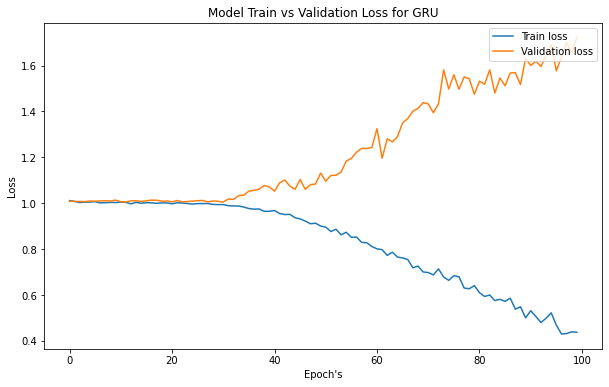

In [48]:
def model_evaluate (model_history, model_name):
    plt.figure(figsize = (10, 6))
    plt.ylabel("Loss")
    plt.xlabel("Epoch's")
    plt.plot(model_history.history["loss"])
    plt.plot(model_history.history["val_loss"])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.legend(["Train loss", "Validation loss"], loc="upper right")

print(GRU_MDL.history)
model_evaluate(GRU_MDL, "GRU")


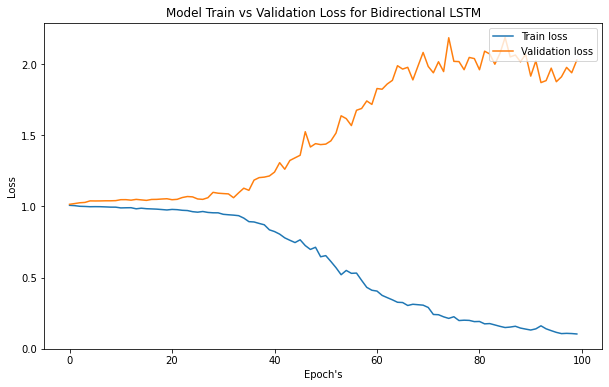

In [49]:
model_evaluate( BILSTM_MDL, "Bidirectional LSTM")



# Predict the Test Data

In [50]:
def predict_test_data(model,model_name,X_test,y_test):
      # Model Prediction
      predict_data= model.predict(X_test)
      predict_data = std_scaler.inverse_transform(predict_data) # Inv transform for Min Max Scaler
      forecast_range = len(predict_data)
      # Plot predicted result vs test data result
      plt.figure(figsize=(11, 7))
      plt.plot(np.arange(forecast_range),
              np.array(y_test), label="Test Data")
      plt.plot(np.arange(forecast_range), 
              np.array(predict_data),label="Predicted Data")
      plt.title("Test Data (vs) Predicted Data for " + model_name)
      plt.legend(loc="upper right")
      plt.xlabel("Day (Time)")
      plt.ylabel("PM 2.5 Level")
      return predict_data



(473, 1)

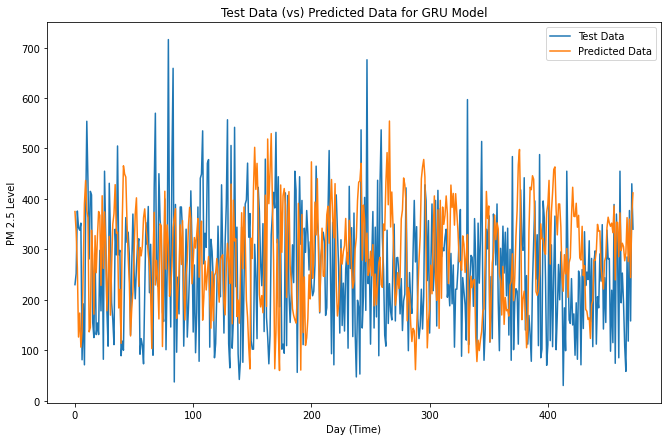

In [51]:
GRU_Predict = predict_test_data(GRU_Model,"GRU Model",X_test,y_test)
GRU_Predict.shape

(473, 1)

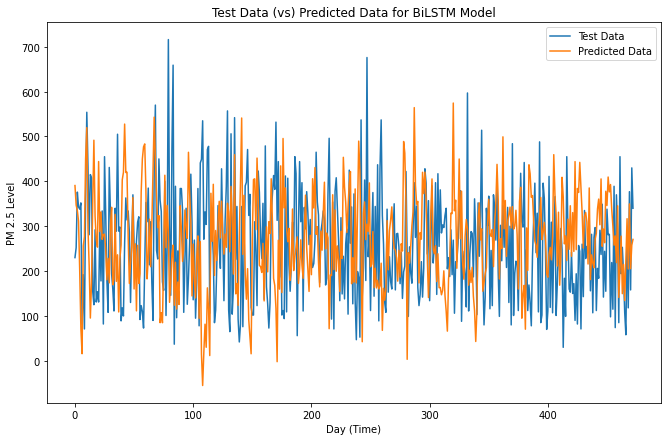

In [52]:
BiLSTM_Predict = predict_test_data(BiLstm_Model,"BiLSTM Model",X_test,y_test)
BiLSTM_Predict.shape


In [53]:
GRU_MDL

# MAE & RMSE - Calculation
# Mean Absolute Error    - MAE
# Root Mean Square Error - RMSE

In [54]:
def predict_error(model_name,actual_data,predict_data):
    error_data = predict_data - actual_data
    # Mean Absolute Error - MAE
    mae = np.abs(error_data).mean()
    # Mean Square Error - RMSE
    mse = np.square(error_data).mean()
    # Root Mean Square Error - RMSE
    rmse = np.sqrt(mse)
    display(model_name)
    print("Mean Absolute Error - MAE :   {} ".format(mae) )
    print("Root Mean Square Error - RMSE :   {} ".format(rmse) )
    return mae,rmse


# Error calculation for GRU Model

In [55]:
predict_error("GRU Model",y_test,GRU_Predict)


'GRU Model'

Mean Absolute Error - MAE :   128.08161649912324 
Root Mean Square Error - RMSE :   156.16810489819292 


(128.08161649912324, 156.16810489819292)

# Error calculation for BiLSTM Model

In [56]:
predict_error("BiLSTM Model",y_test,BiLSTM_Predict)


'BiLSTM Model'

Mean Absolute Error - MAE :   127.35395472212691 
Root Mean Square Error - RMSE :   159.8195228167518 


(127.35395472212691, 159.8195228167518)

# Predict New Data (for Forecast)

In [57]:
def new_dataset_create_forecast (X, look_back = 1):
    Xs = []
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
 
    return np.array(Xs)

In [58]:
# Select 50 days of data from test data
new_data = test_data.iloc[100:160]
scaled_new_data  = std_scaler.transform(new_data)
days_30= new_dataset_create_forecast(scaled_new_data,30)
days_30.shape

(30, 30, 1)

In [59]:
def Forecast_Predict(model):
    model_forecast = model.predict(days_30)
    model_forecast = std_scaler.inverse_transform(model_forecast)
    return model_forecast   

In [60]:
GRU_Forecast    = Forecast_Predict(GRU_Model)
BiLSTM_Forecast = Forecast_Predict(BiLstm_Model)

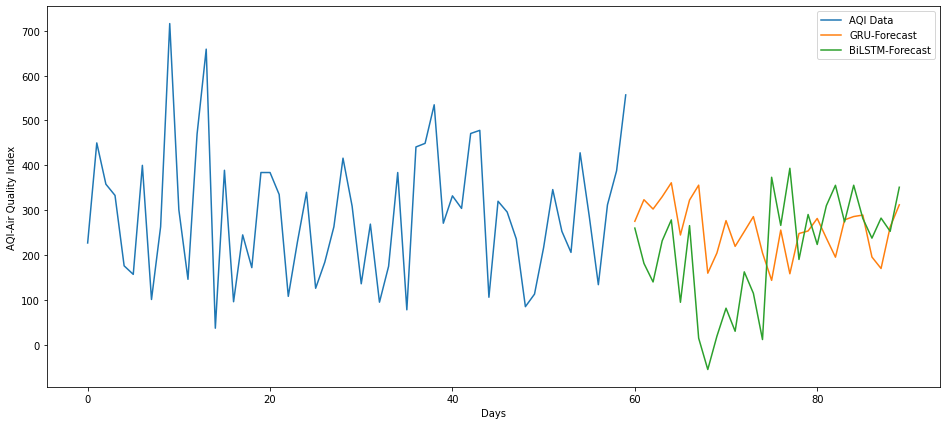

In [62]:
plt.figure(figsize=(16, 7))
range_forecast = len(new_data)

forecast_list_GRU = list(range(range_forecast, range_forecast + len(GRU_Forecast)))
forecast_list_BiLSTM = list(range(range_forecast, range_forecast + len(BiLSTM_Forecast)))

plt.plot(np.arange(range_forecast), np.array(new_data), label='AQI Data')
plt.plot(forecast_list_GRU, np.array(GRU_Forecast),label='GRU-Forecast')
plt.plot(forecast_list_BiLSTM, np.array(BiLSTM_Forecast),label='BiLSTM-Forecast')
plt.legend(loc='upper right')
plt.xlabel('Days')
plt.ylabel('AQI-Air Quality Index')
plt.savefig('Forecasted_Results.png')